<h1><center>Meat Quality Assessment</center></h1>

<center><img src="https://im.haberturk.com/2019/02/23/ver1550911120/2382763_810x458.jpg"></center>

DataSet Information

This dataset contains 2 classes, fresh and spoiled red meat samples collected from a supermarket in Izmir, Turkey
for a university-industry collaboration project at Izmir University of Economics, and this work
was published in ASYU 2019. 


***Purpose of the work***

This dataset was collected in order to develop a meat quality assessment system which is based on deep learning. 
All of the experimental results which are explained in the paper, prove the usability of our dataset and our model can successfully distinguish between the classes with high accuracy.

<a id="t1."></a>
# 1. Import data and python packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [8]:
sample_size = 500
width = 100
height = 100

In [4]:
files = ['Fresh', 'Spoiled']
adress = '/kaggle/input/meat-quality-assessment-based-on-deep-learning/{}'
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

In [5]:
pd.DataFrame(data).head()

,Fresh,Spoiled
0,test_20171016_165121D.jpg,test_20171018_222121D.jpg
1,test_20171016_203521D.jpg,test_20171018_130121D.jpg
2,test_20171016_195721D.jpg,test_20171018_111521D.jpg
3,test_20171017_113721D.jpg,test_20171018_193521D.jpg
4,test_20171017_163721D.jpg,test_20171018_232321D.jpg


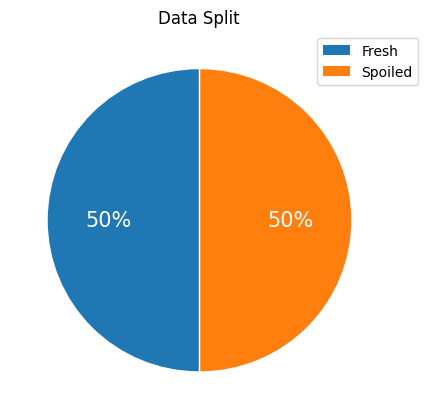

In [6]:
sizes = [len(data['Fresh']), len(data['Spoiled'])]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [9]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(adress.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class Spoiled
Calculate Time 23.46824


In [10]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(1000, 100, 100, 3)

<a id="t2."></a>
# 2. Data visualization

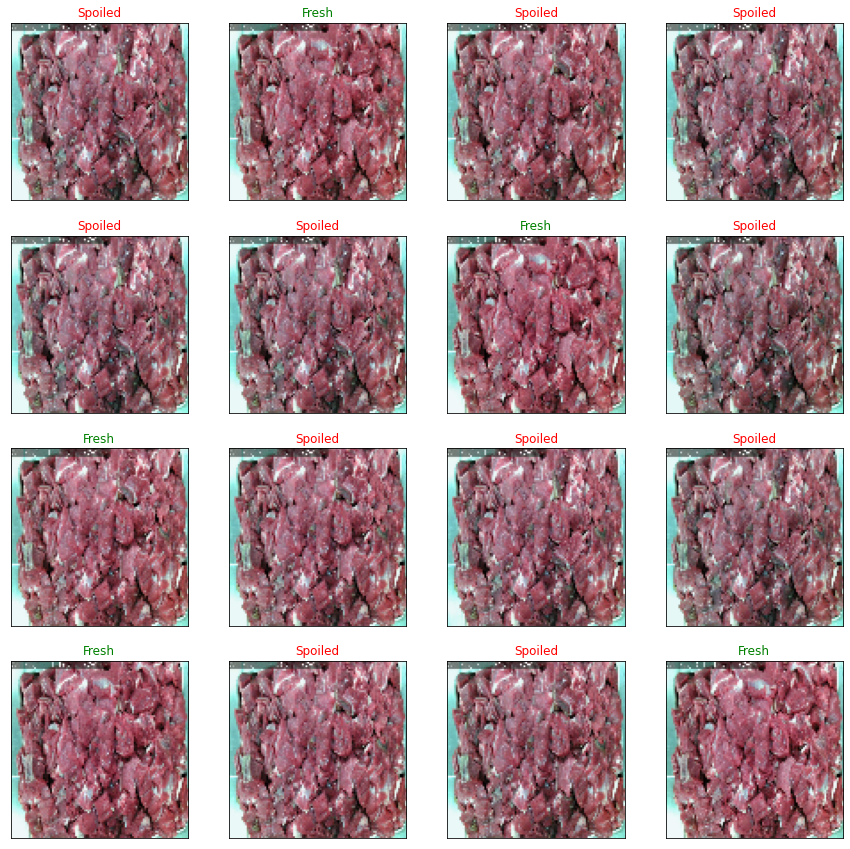

In [11]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

<a id="t3."></a>
# 3. Classification (CNN)

In [12]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [13]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [14]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
22/22 [==============================] - 8s 344ms/step - loss: 0.7579 - accuracy: 0.5587 - val_loss: 0.4736 - val_accuracy: 0.9533
Epoch 2/10
22/22 [==============================] - 7s 315ms/step - loss: 0.3613 - accuracy: 0.9390 - val_loss: 0.1285 - val_accuracy: 0.9400
Epoch 3/10
22/22 [==============================] - 7s 313ms/step - loss: 0.2240 - accuracy: 0.9173 - val_loss: 0.1512 - val_accuracy: 0.9267
Epoch 4/10
22/22 [==============================] - 7s 321ms/step - loss: 0.1547 - accuracy: 0.9235 - val_loss: 0.1377 - val_accuracy: 0.9633
Epoch 5/10
22/22 [==============================] - 7s 313ms/step - loss: 0.1036 - accuracy: 0.9585 - val_loss: 0.1281 - val_accuracy: 0.9400
Epoch 6/10
22/22 [==============================] - 7s 313ms/step - loss: 0.0851 - accuracy: 0.9652 - val_loss: 0.0912 - val_accuracy: 0.9800
Epoch 7/10
22/22 [==============================] - 7s 307ms/step - loss: 0.0617 - accuracy: 0.9792 - val_loss: 0.0769 - val_accuracy: 0.9833
Epoch 

10/10 - 1s - loss: 0.0737 - accuracy: 0.9900


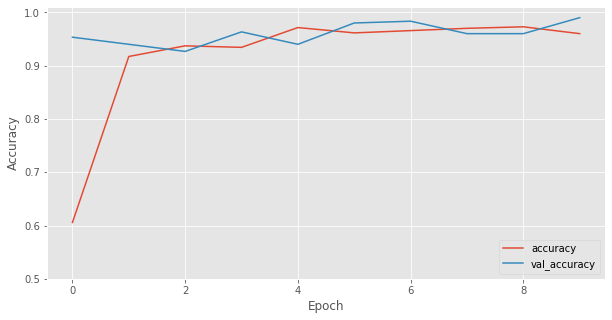

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [19]:
result=model.evaluate(test_images, test_labels)

10/10 [==============================] - 1s 67ms/step - loss: 0.0737 - accuracy: 0.9900


In [20]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.07368741184473038
accuracy : 0.9900000095367432


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 35)        980       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 35)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        20224     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

<a id="t4."></a>
# 4. Prediction

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

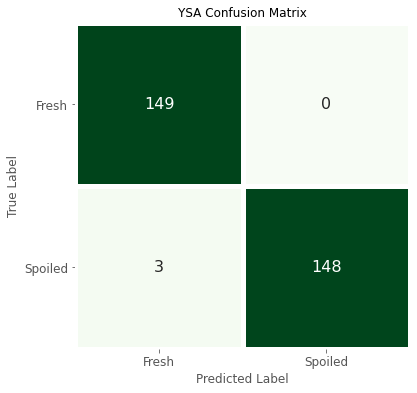

In [23]:
y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Fresh","Spoiled"], index= ["Fresh","Spoiled"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [24]:
def Prediction(image):
    
    global width, height, files, labels
    
    img = cv2.resize(image,(width,height))
    
    test = img / 255.0
    
    pred = model.predict(np.array([image])).argmax()
    
    return labels.inverse_transform([pred])[0]

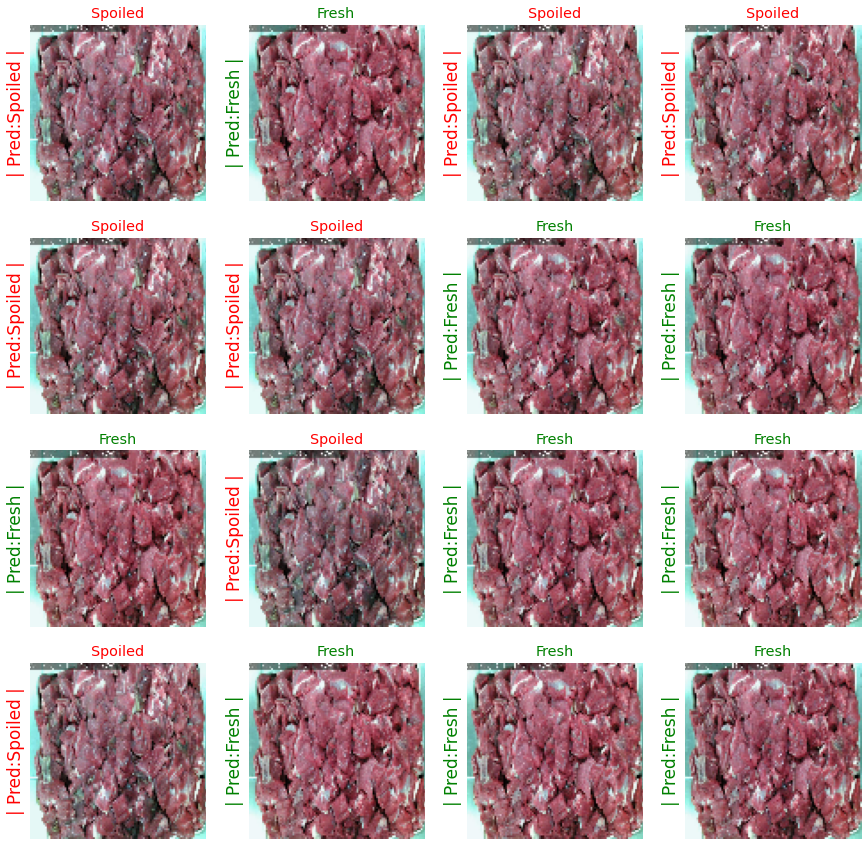

In [25]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()